In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
import math
sns.set_style('whitegrid')

In [2]:
# ipath= "C:\Users\Administrator\Desktop\科研风速数据资料\美国时刻风速数据\上海\虹桥\\9705626661750dat.txt"
# For Shanghai
# df.drop(['NCDC', 'Date','I', 'Type', 'Q', 'Q.1'], 1, inplace=True)
# df.rename(columns={'HrMn':'date','Dir': 'dir', 'Spd':'speed'}, inplace=True)

# ipath = '6581206807038dat.txt'
ipath = './ciampino/6240476818161dat.txt'
# ipath = 'tiree.txt'
# ipath= "marham.txt"
uipath = unicode(ipath , "utf8")
file2 = open(uipath)
df = pd.read_csv(uipath,header=0, skipinitialspace=True)
df.drop(['USAF', 'NCDC', 'I','Type' ,'QCP','Q','Q.1','I.1','Unnamed: 12'], 1,inplace=True)
df.rename(columns={'Date':'date','Dir': 'dir', 'Spd':'speed'}, inplace=True)
df.describe()

,date,HrMn,dir,speed
count,856948.000000,856948.000000,856948.000000,856948.000000
mean,19908025.474953,1171.849007,339.471443,2.954437
std,150862.076209,691.188940,353.528048,17.612657
min,19511001.000000,0.000000,1.000000,0.000000
25%,19810706.000000,600.000000,110.000000,1.000000
50%,19900326.000000,1200.000000,200.000000,2.100000
75%,20040918.000000,1800.000000,340.000000,4.100000
max,20150901.000000,2359.000000,999.000000,999.900000


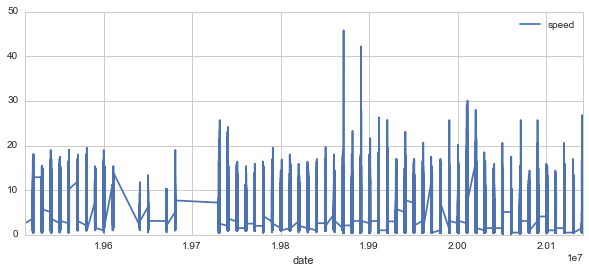

In [3]:
# select year 1945-2014, dir < 999, speed<999
df = df[(df['dir'] < 999) & (df['speed'] < 999)& (df['date'] < 20150000) ]
df.rename(columns={'speed':'speed_mps'}, inplace=True)
df['speed']=df['speed_mps']
df.index= df['date']
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

# Data Selection
# Marham, date >1973
df = df[ (df['date'] > 19740000) & (df['date'] < 20150000)]
# df = df[df['HrMn'] % 100 <= 0.1]
# For Roma Ciampino
df = df[(df['HrMn'] % 100 == 15)|(df['HrMn'] % 100 == 45)|(df['HrMn'] % 100 == 20)|(df['HrMn'] % 100 == 50)]

In [4]:
df['speed']=df['speed_mps']*1.943845
# need more elaboration, some is not near an integer
df['speed'] =  df['speed'].apply(lambda x: int(round(x)))

In [5]:
df.describe()

,date,HrMn,dir,speed_mps,speed
count,443549.000000,443549.000000,443549.000000,443549.000000,443549.000000
mean,19962239.446235,1203.240826,162.733524,3.243701,6.331731
std,122314.774955,653.940142,97.564095,2.274526,4.418412
min,19740101.000000,15.000000,1.000000,0.100000,0.000000
25%,19860730.000000,650.000000,70.000000,1.500000,3.000000
50%,19980525.000000,1220.000000,170.000000,2.600000,5.000000
75%,20071110.000000,1745.000000,230.000000,4.100000,8.000000
max,20141231.000000,2350.000000,360.000000,45.800000,89.000000


              date  HrMn  dir  speed_mps  speed  incre  incre_reverse
date                                                                 
19871130  19871130  1050  170       45.8     89     84             79
19871129  19871129  2050  180       44.8     87     81             79
19890706  19890706   850   30       42.2     82     80             80
19891114  19891114   750   30       27.8     54     48             50
20071212  20071212  1415  330       25.7     50     39             42
20090220  20090220  1145  360       25.7     50     42             42
19740430  19740430   650  170       24.1     47     18              7
19740203  19740203   720  160       23.1     45      8              0
19740203  19740203   850  150       23.1     45      0              1
19740218  19740218   350  160       23.1     45     11              7
19740203  19740203   920  160       22.6     44     -1              3
19740303  19740303  2320  150       22.1     43      3              3
19740304  19740304  

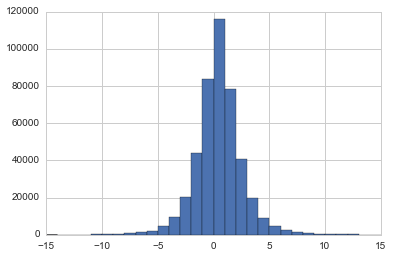

In [113]:
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0)
print df.sort('speed',ascending=False).head(20)
bins=np.arange(-15, 15 + 1, 1)
df['incre'].hist(bins=bins)

In [114]:
# df['incre'].value_counts()

In [115]:
# Simple Artefacts Handling
df =  df[ (df['incre'] < 20)&(df['incre_reverse'] < 20)]
df = df[df['dir'] % 10 <= 0.1]
df = df[df['speed'] >= 0.1 ]

              date  HrMn  dir  speed_mps  speed  incre  incre_reverse
date                                                                 
19740430  19740430   650  170       24.1     47     18              7
19740218  19740218   350  160       23.1     45     11              7
19740203  19740203   850  150       23.1     45      0              1
19740203  19740203   720  160       23.1     45      8              0
19740203  19740203   920  160       22.6     44     -1              3
19740304  19740304    50  170       22.1     43      3              1
19740304  19740304   150  160       22.1     43      1              5
19740303  19740303  2320  150       22.1     43      3              3
19901209  19901209  1750  160       21.6     42      6             13
19740304  19740304   120  170       21.6     42     -1             -1
19920331  19920331  1620  150       21.6     42      1              4
20021116  20021116   745  140       21.6     42      2              5
19920331  19920331  

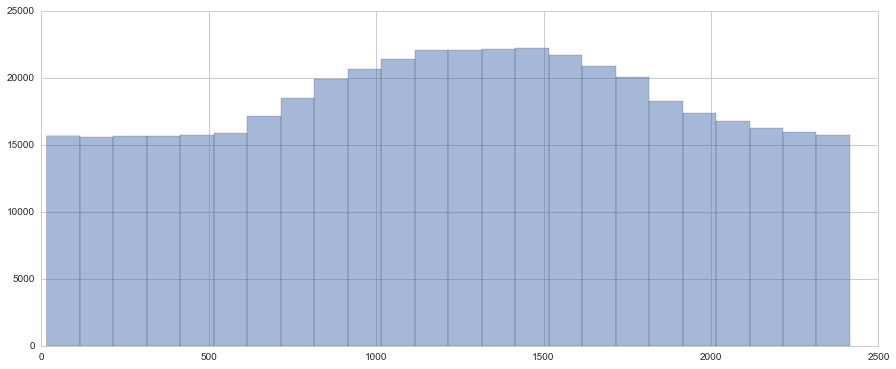

In [116]:
# Speed max
print df.sort('speed',ascending=False).head(20)
# ensure data sampled equally
print df['HrMn'].value_counts()
bins=np.arange(min(df.HrMn), max(df.HrMn) + 100, 100)
df['HrMn'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

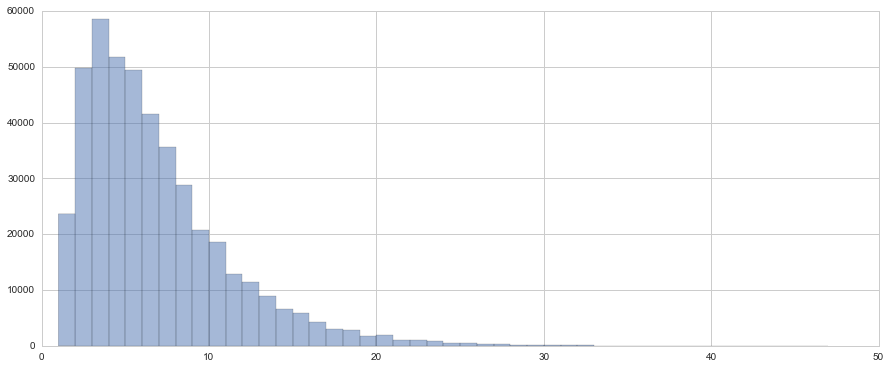

In [117]:
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

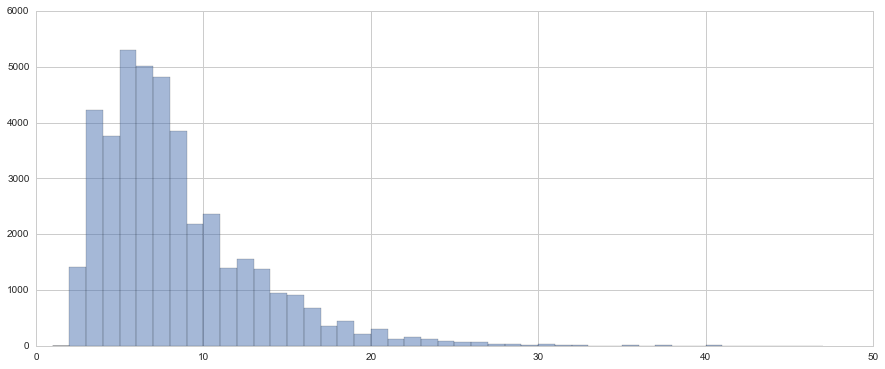

In [118]:
# Tiree has severe problem of odd-even bias 
df_temp = df[ (df['date'] > 19720000) & (df['date'] < 19790000)]
bins=np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

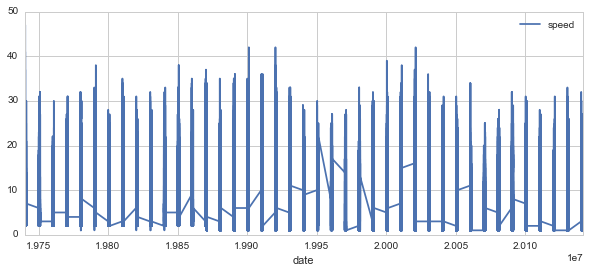

In [119]:
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

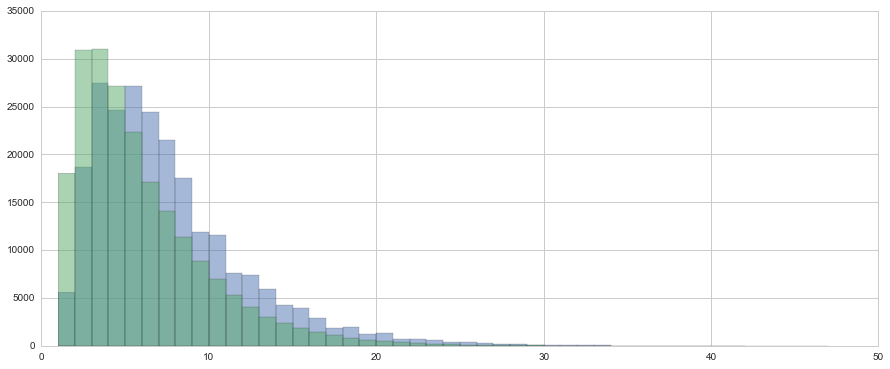

In [120]:
# 非平稳过程，2000年之后有较大的差别
# 上海的话，只是略有差别
df_temp = df[df['date'] < 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins,alpha = 0.5,figsize=(15, 6))

df_temp = df[df['date'] > 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins, alpha = 0.5,figsize=(15, 6))

In [121]:
# df = df[ (df['date'] > 19990000) & (df['date'] < 20110000)]
# print len(df)

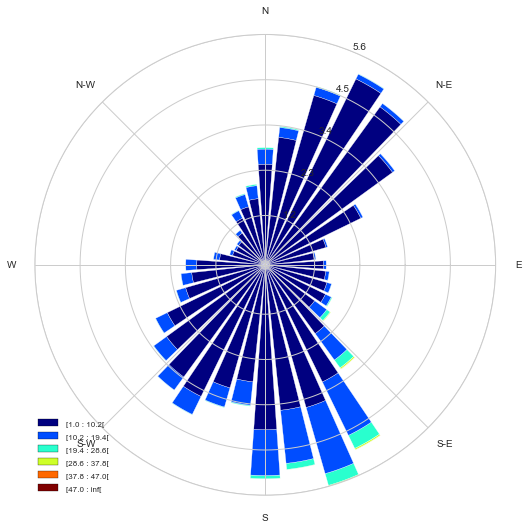

In [122]:
from windrose import WindroseAxes
from math import pi
import matplotlib.cm as cm

df.dir_windrose = df.dir
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

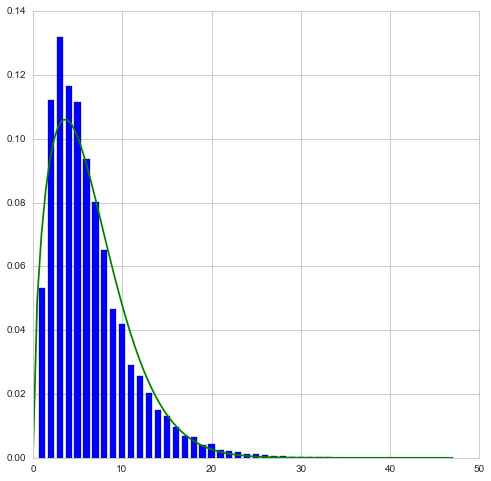

In [123]:
from windrose import WindAxes
ax = WindAxes.from_ax()
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
ax, params = ax.pdf(df.speed, bins = bins)

In [124]:
print params
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
print weibull_params

(1, 1.5445022172439495, 0, 7.0767018615014479)
(1, 1.5445022172439495, 0, 7.0767018615014479)


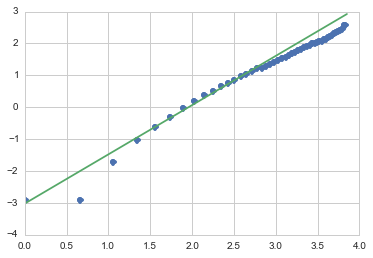

In [125]:
import statsmodels.api as sm # recommended import according to the docs

sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')
plt.show()

0.263568446316 -1.82753371418


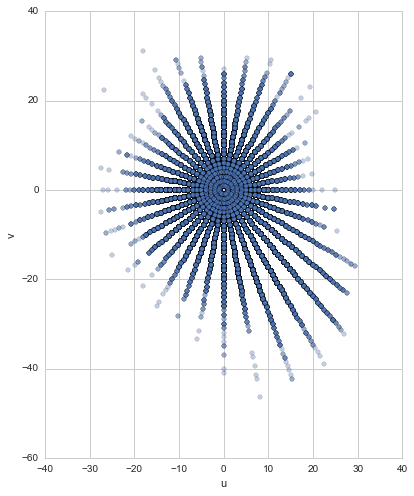

In [126]:
df['dir'] = 90-df.dir
df['dir'] = df['dir'].apply(lambda x: x + 360 if x < 0 else x)
alpha = 0
df['phi'] = df['dir'] - alpha
df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
df['x']=df.u
df['y']=df.v
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='u', y='v', alpha=0.35, ax=ax)
print np.mean(df.u), np.mean(df.v)

In [127]:
# 看是否少了方向，上海为36，长沙仅为16，长沙不可用
df['dir'].value_counts()

290    24791
270    23033
60     22879
280    22156
300    22139
50     21476
70     19970
240    17952
40     17221
230    16673
250    15981
260    15290
80     14979
220    14868
310    13863
210    13150
90     12615
30     11690
200     9975
190     9136
100     8718
320     8698
180     8565
330     8026
110     7978
340     7438
20      6976
350     6944
0       6567
120     6545
170     5612
10      5470
130     4601
160     3989
140     3782
150     3697
dtype: int64

In [128]:
# Randomize angle
# df['random_angle_incre'] = 0
# df['random_angle_incre'] = df['random_angle_incre'].apply(lambda x: np.random.uniform(-5,5))
# df['dir_ran']=df['dir']+df['random_angle_incre']
# bins=np.arange(min(df.dir_ran), max(df.dir_ran) + 1, 1)

# df['dir_ran']= df['dir_ran'].apply(lambda x: x + 360 if x < 0 else x)
# df['dir_ran']= df['dir_ran'].apply(lambda x: x - 360 if x > 360 else x)
# df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
# df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

In [129]:
# df['dir']=df['dir_ran']

# 0. Naive OEN Estimation

In [130]:
def cor_of_alpha(alpha):
    df['phi'] = df['dir'] - alpha
    df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
    df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
    cor = sp.stats.pearsonr(df['u'],df['v'])
    return cor[0]

# Try plot alpha - cor
import pylab 
def plot_cor():
    cors = []
    for alpha in np.arange(0,180,10):
        cor = cor_of_alpha(alpha)
        std_u = np.std(df.u)
        std_v = np.std(df.v)
        comb = [alpha, cor, std_u, std_v]
        cors.append(comb)
        print comb

    plt.scatter(zip(*cors)[0], zip(*cors)[1])

    pylab.plot(zip(*cors)[0], zip(*cors)[2])
    pylab.plot(zip(*coptimize.brentqors)[0], zip(*cors)[3])
    pylab.show()

In [131]:
# Find the desired alpha for cor
alpha = sp.optimize.brentq(cor_of_alpha, 0, 90)
df['phi'] = df['dir'] - alpha
df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
cor = sp.stats.pearsonr(df.u,df.v)

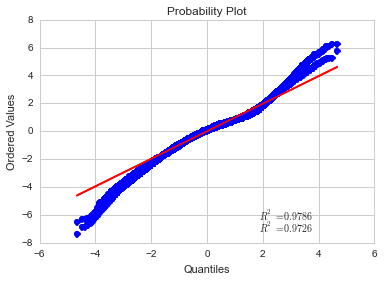

0.0359902847414 4.31906018348
-1.84609114124 6.11587015194
7.08979642527


In [132]:
# Compare u,v with normal distrubution
## P-P plot, vs Q-Q plot, should be q-q
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
mean = np.mean(df.u)
std = np.std(df.u)
df['u_norm']=df['u'].apply(lambda x: (x-mean)/std)

mean = np.mean(df.v)
std = np.std(df.v)
df['v_norm']=df['v'].apply(lambda x: (x-mean)/std)
stats.probplot(df.u_norm, dist="norm", plot=pylab)
stats.probplot(df.v_norm, dist="norm", plot=pylab)

pylab.show()
u, sigu  = np.mean(df.u),np.std(df.u)
v, sigv = np.mean(df.v),np.std(df.v)
print u, sigu
print v, sigv
print alpha

In [133]:
# from sympy import init_printing
# init_printing() 
# from sympy import *
# from __future__ import division
# import numpy as np
# import matplotlib.pyplot as plt
# V, theta = symbols('v theta')
# # U, phi, sigu, sigv = symbols('U phi sigu sigv')
# u,v = -2.63582726849, 0.562272364634
# sigu, sigv = 7.9369982103, 6.56056711043
# U = (u)**2 + (v)**2
# phi = atan(u/v)
# expr = exp(((V*cos(theta)-U*cos(phi))**2/sigu**2+(V*sin(theta)-U*sin(phi))**2/sigv**2)*-1/2)*V
# expr

In [134]:
print u, sigu
print v, sigv

0.0359902847414 4.31906018348
-1.84609114124 6.11587015194


In [135]:
from scipy import integrate
from __future__ import division
from math import *
U = sqrt((u)**2 + (v)**2)
phi = atan(u/v)

def f(V,theta):
    return exp(-1/2* (( (V*cos(theta)-U*cos(phi)) /sigu)**2 + ((V*sin(theta)-U*sin(phi)) /sigv)**2))/(2*np.pi*sigu*sigv)*V
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

In [136]:
# x is the speed, y is the probalility
x_vals = np.linspace(0,50.)
y_vals =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals]

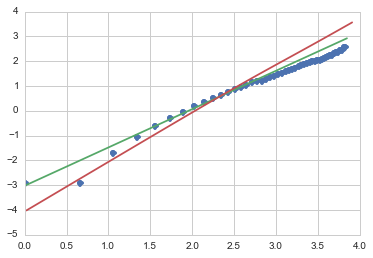

In [137]:
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = df.speed
ecdf = sm.distributions.ECDF(sample)

# Empirical distribution, plot points
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# Weibull distribution
x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')

# OEN distribution
x, y_ = x_vals, y_vals
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-')

plt.show()

# 1. Kernel Density Estimation

In [138]:
# new_set = np.array(zip(-df.x, -df.y)) # Match the orientation of paper
new_set = np.array(zip(df.x, df.y))

In [139]:
from sklearn import mixture
import matplotlib as mpl
from matplotlib.patches import Ellipse

In [140]:
sample = new_set
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=2.0,atol=0.0005,rtol=0.01).fit(sample)

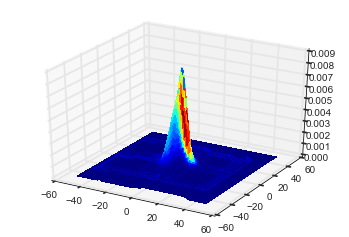

<matplotlib.contour.QuadContourSet instance at 0x10c02cb00>

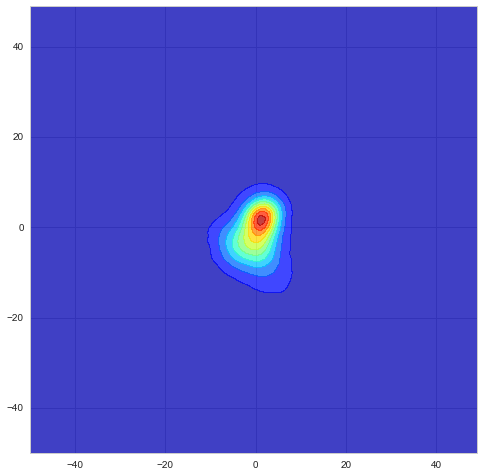

In [141]:
# Python-matplotlib Commands
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

def plot_3d_prob_density(X,Y,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    Gx, Gy = np.gradient(Z) # gradients with respect to x and y
    G = (Gx**2+Gy**2)**.5  # gradient magnitude
    N = G/G.max()  # normalize 0..1
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(
        X, Y, Z.T, rstride=1, cstride=1,
        facecolors=cm.jet(N),
        linewidth=0, antialiased=False, shade=False)
    return plt.show()

X = np.arange(-50, 50, 1)
Y = X
N, M = len(X), len(Y)
Z = np.zeros((N, M))
for i, (x,y) in enumerate(product(X,Y)):
    Z[np.unravel_index(i, (N,M))] = exp(kde.score([x,y]))
#     Z[np.unravel_index(i, (N,M))] = exp(kde.score([sqrt(x**2+y**2),(atan2(y,x))/pi*180]))

plot_3d_prob_density(X,Y,Z)

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
plt.contourf(X, Y, Z.T, 10, alpha=.75, cmap='jet')

# 2. GMM Estimation, using EM algo

In [142]:
sample= new_set

# fit a Gaussian Mixture Model with two components
clf = mixture.GMM(n_components=3, covariance_type='full')
clf.fit(sample)

print clf.weights_
print clf.means_
print clf.covars_ 
print clf.converged_

[ 0.35703723  0.24448318  0.39847959]
[[-2.37788315 -4.50323955]
 [ 2.32940339 -3.4494089 ]
 [ 1.36283345  1.56498087]]
[[[ 18.27891186  -3.95922775]
  [ -3.95922775  14.51586478]]

 [[ 28.6626712  -19.52297789]
  [-19.52297789  85.28049264]]

 [[  3.49096457   1.75623038]
  [  1.75623038   8.28511206]]]
True


In [143]:
from numpy import inf
def f(x,y):
    # exp to turn log probabilty into normal
    return exp(clf.score([[x,y]]))
integrate.nquad(f, [[-50, 50],[-50, 50]])

(0.9999999435916116, 1.479411778350465e-08)

[ 12.01382639  20.78095025]
[[-0.53421787 -0.84534683]
 [-0.84534683  0.53421787]]
u [-0.53421787 -0.84534683]
-122.290884967
[ 22.58348672  91.35967712]
[[-0.95478226 -0.29730595]
 [-0.29730595  0.95478226]]
u [-0.95478226 -0.29730595]
-162.70413602
[ 2.91645495  8.85962168]
[[-0.95043819  0.31091358]
 [ 0.31091358  0.95043819]]
u [-0.95043819  0.31091358]
161.885704152


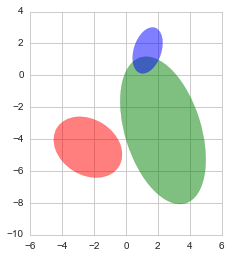

In [144]:
# how to write the for loop?
fig, ax = plt.subplots()
for i, color in enumerate('rgb'):
    # eigenvalues, and eigen vector
    v, w = np.linalg.eigh(clf._get_covars()[i][:2, :2])
    print v
    print w

    u1 = w[0] / np.linalg.norm(w[0])
    print 'u', u1
    angle = np.arctan2(u1[1], u1[0])
    angle = 180 * angle / np.pi
    print angle
    ell = mpl.patches.Ellipse(xy=clf.means_[i], width=sqrt(v[0]), height=sqrt(v[1]), angle = angle, color=color)
    ell.set_alpha(0.5)
    ax.add_patch(ell)
    
# plt.scatter(sample[:, 0], sample[:, 1],  marker='+', alpha=0.5, color = 'y')
ax.set_aspect('equal')
ax.autoscale()
plt.draw() 

(-50, 50)

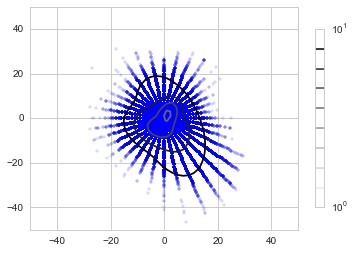

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib.patches import Ellipse

sample= new_set

# plot sample scatter
plt.scatter(sample[:, 0], sample[:, 1], marker='+', alpha=0.5)

x = np.linspace(-100.0, 100.0, 100)
y = x
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0),
                 levels=np.logspace(0, 1, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.xlim((-50,50))
plt.ylim((-50, 50))

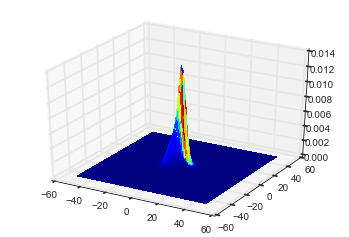

<matplotlib.contour.QuadContourSet instance at 0x1147c9dd0>

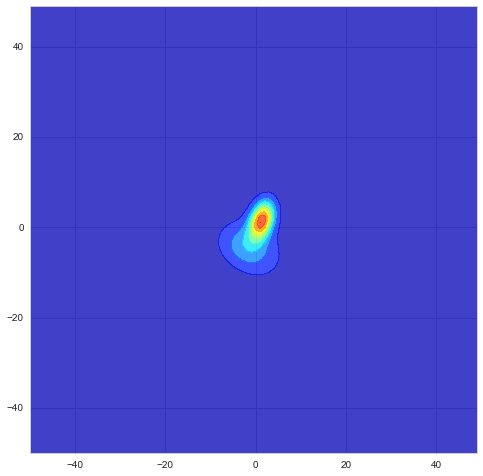

In [146]:
X = np.arange(-50, 50, 1)
Y = X
N, M = len(X), len(Y)
Z = np.zeros((N, M))
for i, (x,y) in enumerate(product(X,Y)):
    Z[np.unravel_index(i, (N,M))] = exp(clf.score([[x,y]]))
    
plot_3d_prob_density(X,Y,Z)

# Plot 2d prob density
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
plt.contourf(X, Y, Z.T, 10, alpha=.75, cmap='jet')

In [147]:
def f(V,theta):
    return exp(clf.score([[V*cos(theta),V*sin(theta)]]))*V
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

x_vals_OEN3 = np.linspace(0,50)
y_vals_OEN3 =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals_OEN3]

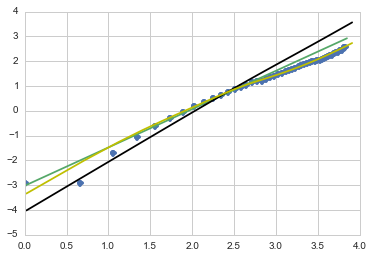

In [148]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = df.speed
ecdf = sm.distributions.ECDF(sample)

# Plot points, with empirical distribution
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# Weibull distribution
x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')

# OEN distribution
x, y_ = x_vals, y_vals
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color='black')

# OEN3 distribution
x, y_ = x_vals_OEN3, y_vals_OEN3
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'y')

plt.show()

In [149]:
# Calculate angle distribution
def f(V,theta):
#     return exp(clf.score([V*cos(theta),V*sin(theta)]))*V
    return exp(clf.score([[V*cos(theta),V*sin(theta)]]))*V

integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

x_vals = np.linspace(0,2*np.pi, num=36)
y_vals =[integrate.nquad(f, [[0, inf],[x_val, x_val+np.pi/18]]) for x_val in x_vals]

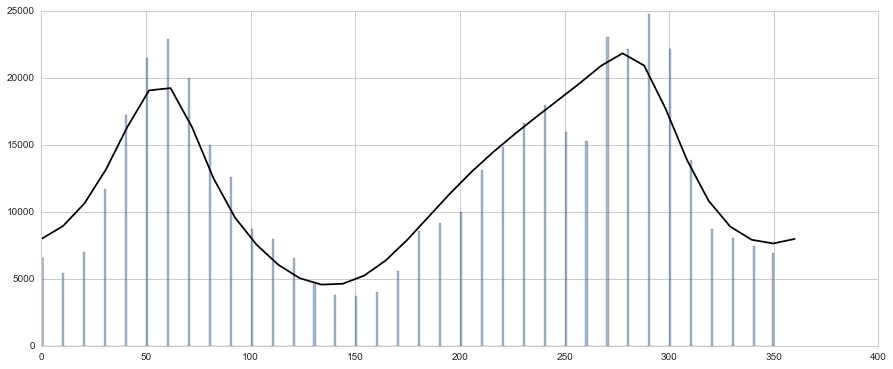

In [150]:
x, y_ = x_vals, y_vals
y = np.array(zip(*y_)[0])*len(sample)
bins=np.arange(min(df.dir), max(df.dir) + 1, 1)
df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
plt.plot(x/np.pi*180, y,'-', color='black')
plt.show()

# 3. Least Square Prob Estimation

In [127]:
sample = new_set
from sklearn.neighbors import KernelDensity
# this speed is ok
kde = KernelDensity(bandwidth=2.0,atol=0.0005,rtol=0.01, kernel = 'linear').fit(sample) 

In [ ]:
# from numpy import inf
# def f(x,y):
#     # exp to turn log probabilty into normal
#     # return exp(clf.score([x,y]))
#     return exp(clf.score([[x,y]]))
# integrate.nquad(f, [[-50, 50],[-50, 50]])

In [ ]:
# This is very slow
kde_result = kde.score_samples(sample) # very slow

In [ ]:
print len(kde_result)

In [ ]:
points = sample

from scipy.stats import multivariate_normal

def create_gaussian_2d(meanx,meany,sigx,sigy,rho):
    sigxy = rho*sigx*sigy
    return multivariate_normal(mean=[meanx,meany], cov=[[sigx**2,sigxy],[sigxy,sigy**2]], allow_singular=True)

def square_error(x0, log_mode = True):
    f1,f2, \
    u1,v1,sigu1,sigv1,rho1, \
    u2,v2,sigu2,sigv2,rho2, \
    u3,v3,sigu3,sigv3,rho3 = x0
    # 1. Generate Mixed Gaussian Model    
    g1 = create_gaussian_2d(u1,v1,sigu1,sigv1,rho1)   
    g2 = create_gaussian_2d(u2,v2,sigu2,sigv2,rho2)
    g3 = create_gaussian_2d(u3,v3,sigu3,sigv3,rho3) 
    def mixed_model(points):
        return f1*g1.pdf(points)+f2*g2.pdf(points)+(1-f1-f2)*g3.pdf(points)
    # 2. Calculate the sum of square error
    # kde returns log prob, so need to convert it
    if log_mode:
        error_array = np.power(np.log(mixed_model(points)) - kde_result,2)
    else:
        error_array = np.power(mixed_model(points) - np.exp(kde_result),2)
    return np.average(error_array)

cons = [{'type': 'ineq', 'fun': lambda x: -x[0] - x[1] + 1}]
bonds = [(0., 0.99),(0., 0.99),
            (-50, 50),(-50, 50),(0., 50),(0., 50),(0., 0.99),
            (-50, 50),(-50, 50),(0., 50),(0., 50),(0., 0.99),
            (-50, 50),(-50, 50),(0., 50),(0., 50),(0., 0.99),]

result = sp.optimize.minimize(
    square_error,
    [0.2,0.5,
      3,1,7,1,0.3,
      1,1,1,8,0.5,
      1,1,9,1,0.2],
    bounds = bonds,
    constraints=cons)

result

In [ ]:
f1,f2, \
u1,v1,sigu1,sigv1,rho1, \
u2,v2,sigu2,sigv2,rho2, \
u3,v3,sigu3,sigv3,rho3 = result.x

print u1,v1,sigu1,sigv1,rho1,rho1*sigu1*sigv1
print u2,v2,sigu2,sigv2,rho2,rho2*sigu2*sigv2
print u3,v3,sigu3,sigv3,rho3,rho3*sigu3*sigv3

In [ ]:
f2,u2,v2,sigu2,sigv2,rho2 = 0.004,3.44197130678,1.39720350411,0.000429470663945,12.8017274973,0.896191996336
xx = f1,f2, \
    u1,v1,sigu1,sigv1,rho1, \
    u2,v2,sigu2,sigv2,rho2, \
    u3,v3,sigu3,sigv3,rho3
print xx
square_error(xx)

# Miscellnes

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# sample= new_set
# # Set up the matplotlib figure
# fig, ax = plt.subplots()
# # x, y = rs.randn(2, 50)
# # Generate and plot a random bivariate dataset
# sns.kdeplot(sample[:, 0], sample[:, 1], shade=True, ax=ax)

In [19]:
import ipyparallel as ipp
import numpy as np
clients = ipp.Client()
clients.block = True  # use synchronous computations
print clients.ids

[0, 1, 2]


In [20]:
def mul(a, b):
    return a * b

# mul(5, 6)

view = clients.load_balanced_view()
view.map(mul, [5, 6, 7, 8], [8, 9, 10, 11])

[40, 54, 70, 88]

In [21]:
clients.block = True
dview = clients.direct_view()
dview.block = True
print dview

<DirectView all>


In [22]:
dview.apply(sum, [1, 2, 3])

[6, 6, 6]

In [23]:
A = np.random.random((8, 3))
dview.scatter('A', A)
print A
print
for chunk in dview['A']:
    print chunk

[[ 0.54860463  0.00353694  0.54962522]
 [ 0.14530057  0.26763724  0.19505201]
 [ 0.92922119  0.01266076  0.35369192]
 [ 0.58655272  0.79872213  0.16077865]
 [ 0.99839588  0.61552462  0.97173307]
 [ 0.45421589  0.20741009  0.62827607]
 [ 0.71190185  0.64746663  0.91952471]
 [ 0.46600573  0.95627456  0.10677181]]

[[ 0.54860463  0.00353694  0.54962522]
 [ 0.14530057  0.26763724  0.19505201]
 [ 0.92922119  0.01266076  0.35369192]]
[[ 0.58655272  0.79872213  0.16077865]
 [ 0.99839588  0.61552462  0.97173307]
 [ 0.45421589  0.20741009  0.62827607]]
[[ 0.71190185  0.64746663  0.91952471]
 [ 0.46600573  0.95627456  0.10677181]]


In [24]:
def parallel_dot(dview, A, B):
    dview.scatter('A', A)
    dview['B'] = B
    dview.execute('C = np.dot(A, B)')
    return dview.gather('C')

A = np.random.random((10, 3))
B = np.random.random((3, 5))

np.allclose(parallel_dot(dview, A, B),
            np.dot(A, B))

CompositeError: one or more exceptions from call to method: execute
[0:execute]: NameError: name 'np' is not defined
[1:execute]: NameError: name 'np' is not defined
[2:execute]: NameError: name 'np' is not defined

In [ ]:
Empirical Distribution
df['dir2'] = df['dir'].apply(lambda x: x - 360 if x >= 180 else x)

In [ ]:
df['dir2'].value_counts()

In [ ]:
new_set2 = np.array(zip(df.speed, df.dir2))
sample = new_set
from sklearn.neighbors import KernelDensity
kde = KernelDensity().fit(sample)
sample

In [ ]:
y = [10,8,14,16,17,18,18,7,17,20,14,17,14,13,12,14,13,12,15]
x = range(0, len(y))
plt.plot(x, y,'-')

y = [10,8,14,16,17,18,18,17,17,20,14,17,14,13,12,14,13,12,15]
x = range(0, len(y))
plt.plot(x, y,'-')

y = [10,8,14,16,17,18,18,27,17,20,14,17,14,13,12,14,13,12,15]
x = range(0, len(y))
plt.plot(x, y,'-')
# Test the sum of probability 
# def f(x,y):
#     return exp(kde.score([x,y]))
# integrate.nquad(f, [[0, 30],[0, 30]])